# Part 3: Visualizations and Insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch

## Return on Investment by Lead Source

      lead_source  total_leads  with_opportunity  without_opportunity  \
2  Email Campaign          117                99                   18   
1    Social Media          100                83                   17   
0      Trade Show           98                89                    9   
4        Referral           84                76                    8   
5   Phone Inquiry           22                18                    4   
3             Web           21                19                    2   
6         Partner           18                15                    3   

   conversion_rate  avg_deal_value  
2        84.615385    23282.828283  
1        83.000000    20626.506024  
0        90.816327    21449.438202  
4        90.476190    20013.157895  
5        81.818182    23222.222222  
3        90.476190    25473.684211  
6        83.333333    30466.666667  


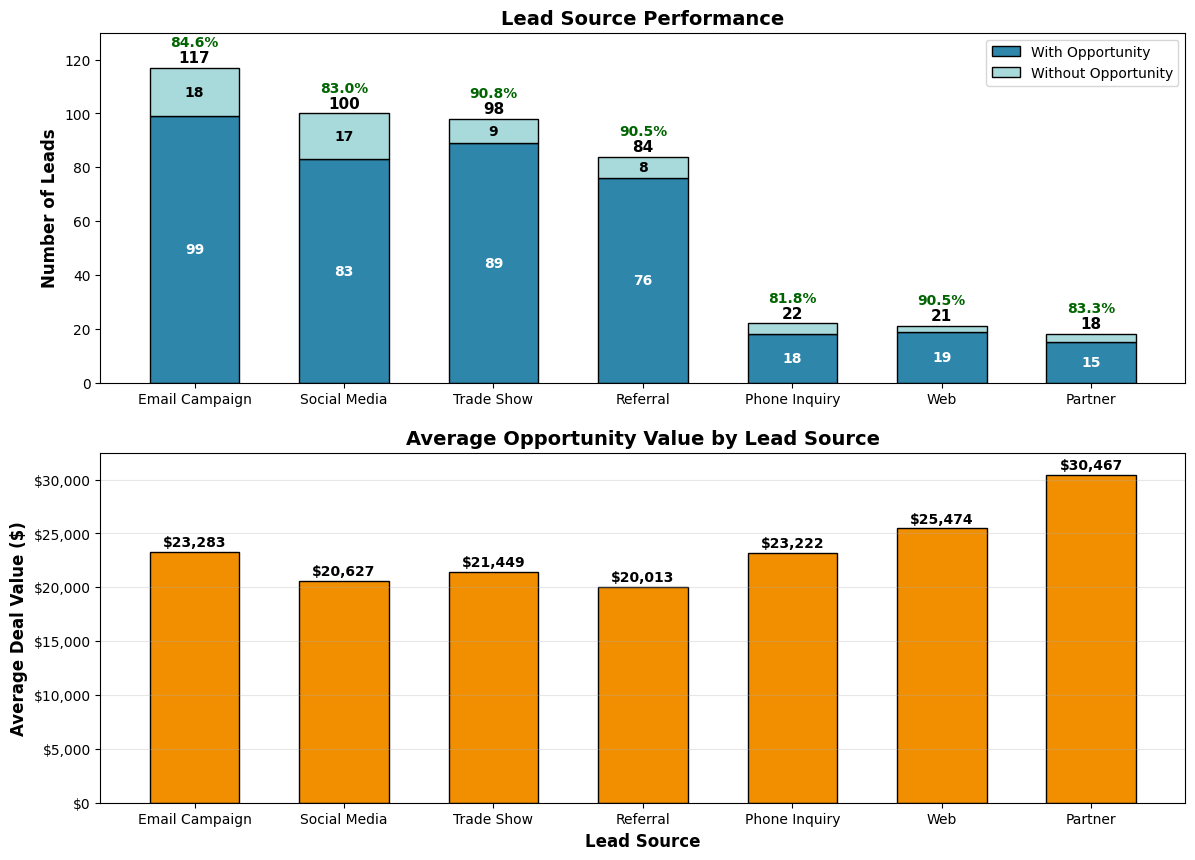

In [2]:
df = pd.read_csv('../data/CleanSalesforceData.csv')

lead_source_metrics = []

lead_sources = df[df['lead_source'].notna()]['lead_source'].unique()

for source in lead_sources:
    source_data = df[df['lead_source'] == source]
    
    total_leads = len(source_data)
    
    # Records with opportunity_amount
    with_opportunity = source_data[source_data['opportunity_amount'].notna()]
    opportunity_count = len(with_opportunity)
    
    no_opportunity = total_leads - opportunity_count
    
    # Conversion rate
    conversion_rate = (opportunity_count / total_leads * 100)
    
    # Average deal value
    avg_deal_value = with_opportunity['opportunity_amount'].mean()
    
    lead_source_metrics.append({
        'lead_source': source,
        'total_leads': total_leads,
        'with_opportunity': opportunity_count,
        'without_opportunity': no_opportunity,
        'conversion_rate': conversion_rate,
        'avg_deal_value': avg_deal_value
    })

# New data frame sorted by total leads
metrics_df = pd.DataFrame(lead_source_metrics)
metrics_df = metrics_df.sort_values('total_leads', ascending=False)
print(metrics_df)

# Create the visualization with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Stacked bar chart
x = np.arange(len(metrics_df))
width = 0.6

bars1 = ax1.bar(x, metrics_df['with_opportunity'], width, 
                label='With Opportunity', color='#2E86AB', edgecolor='black', linewidth=1)
bars2 = ax1.bar(x, metrics_df['without_opportunity'], width, 
                bottom=metrics_df['with_opportunity'],
                label='Without Opportunity', color='#A8DADC', edgecolor='black', linewidth=1)

# Total count label
for i, (total, source) in enumerate(zip(metrics_df['total_leads'], metrics_df['lead_source'])):
    ax1.text(i, total + 2, f'{int(total)}', ha='center', fontweight='bold', fontsize=11)
    
    # Conversion rate label
    conv_rate = metrics_df.iloc[i]['conversion_rate']
    ax1.text(i, total + 8, f'{conv_rate:.1f}%', ha='center', 
             fontsize=10, color='darkgreen', fontweight='bold')

# Axis labels and legend
ax1.set_ylabel('Number of Leads', fontsize=12, fontweight='bold')
ax1.set_title('Lead Source Performance', 
              fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_df['lead_source'])
ax1.legend(loc='upper right', fontsize=10)
ax1.set_ylim(0, 130)

# Add value labels inside the stacked bars
for i, (with_opp, without_opp) in enumerate(zip(metrics_df['with_opportunity'], 
                                                  metrics_df['without_opportunity'])):
    ax1.text(i, with_opp/2, f'{int(with_opp)}', 
            ha='center', va='center', fontweight='bold', color='white', fontsize=10)
    if without_opp > 5:
        ax1.text(i, with_opp + without_opp/2, f'{int(without_opp)}', 
                ha='center', va='center', fontweight='bold', color='black', fontsize=10)

# Average deal value
bars3 = ax2.bar(x, metrics_df['avg_deal_value'], width, 
                color='#F18F01', edgecolor='black', linewidth=1)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars3, metrics_df['avg_deal_value'])):
    ax2.text(bar.get_x() + bar.get_width()/2, value + 500,
            f'${value:,.0f}', ha='center', fontweight='bold', fontsize=10)

# Axis labels and legend
ax2.set_xlabel('Lead Source', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Deal Value ($)', fontsize=12, fontweight='bold')
ax2.set_title('Average Opportunity Value by Lead Source', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics_df['lead_source'])
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 32500)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

### Analysis

This first plot shows how many leads each source produced and how many of those actually became opportunities. For instance we can see that web sources may not have the highest number of leads, but they efficiently turn leads into opportunities. On the other end of the spectrum we can see that Social Media Sources boast a far greater amount of leads, but they are not as efficient at converting leads into opportunities. The use of the stacked bar chart allows us to see volume but also conversion rates. 

Our second plot shows the average deal value from each of the sources. Here we can see that partner leads have the highest average deal value of $30,467 and Referral leads have the lowest average deal value of $20,013. The pairing of these two plots highlights how effective certain leads are at generating high value opportunities. 

A businees risk I see is heavily investing in sources like Social Media. A source like this has a lower conversion rate, but a higher volume of leads. This could lead to the company putting in too much effort into low quality leads that may just end up wasting time. Paired with the lower average deal value, they may need to reflect and see if this source of leads is as profitable as they think it is. 

On the positive side I noticed the effectiveness of web and partner leads. In the case of web leads they have a high conversion rate and a high average deal value. This makes sense to me as those seeking the company's services are more likely to end up actually following through. Furthermore, companies seeking these services are more likely to bring in significant deals, otherwise they would not be seeking these services. 

Overall I would recommend scaling up high-coversion sources like trade show, show, referral, and web. This could be achieved by expanding geographically to more locations, drilling down the importance of connections, and just creating a bigger online presence. I would also reccommend rethinking strategies with low coversion rates, especially if the average deal value is not particularly impressive. The company can reflect on who they target with via sources like email and social media. While it may be rash, I would recommend not putting more effort into phone inquiries as I personally hardly respond to these types of leads in my own life. I would only advise not to do so if these leads are correlated or sometimes classfied this way as they are mediums for other sources like partner and referral. 

## Scoring Account Health

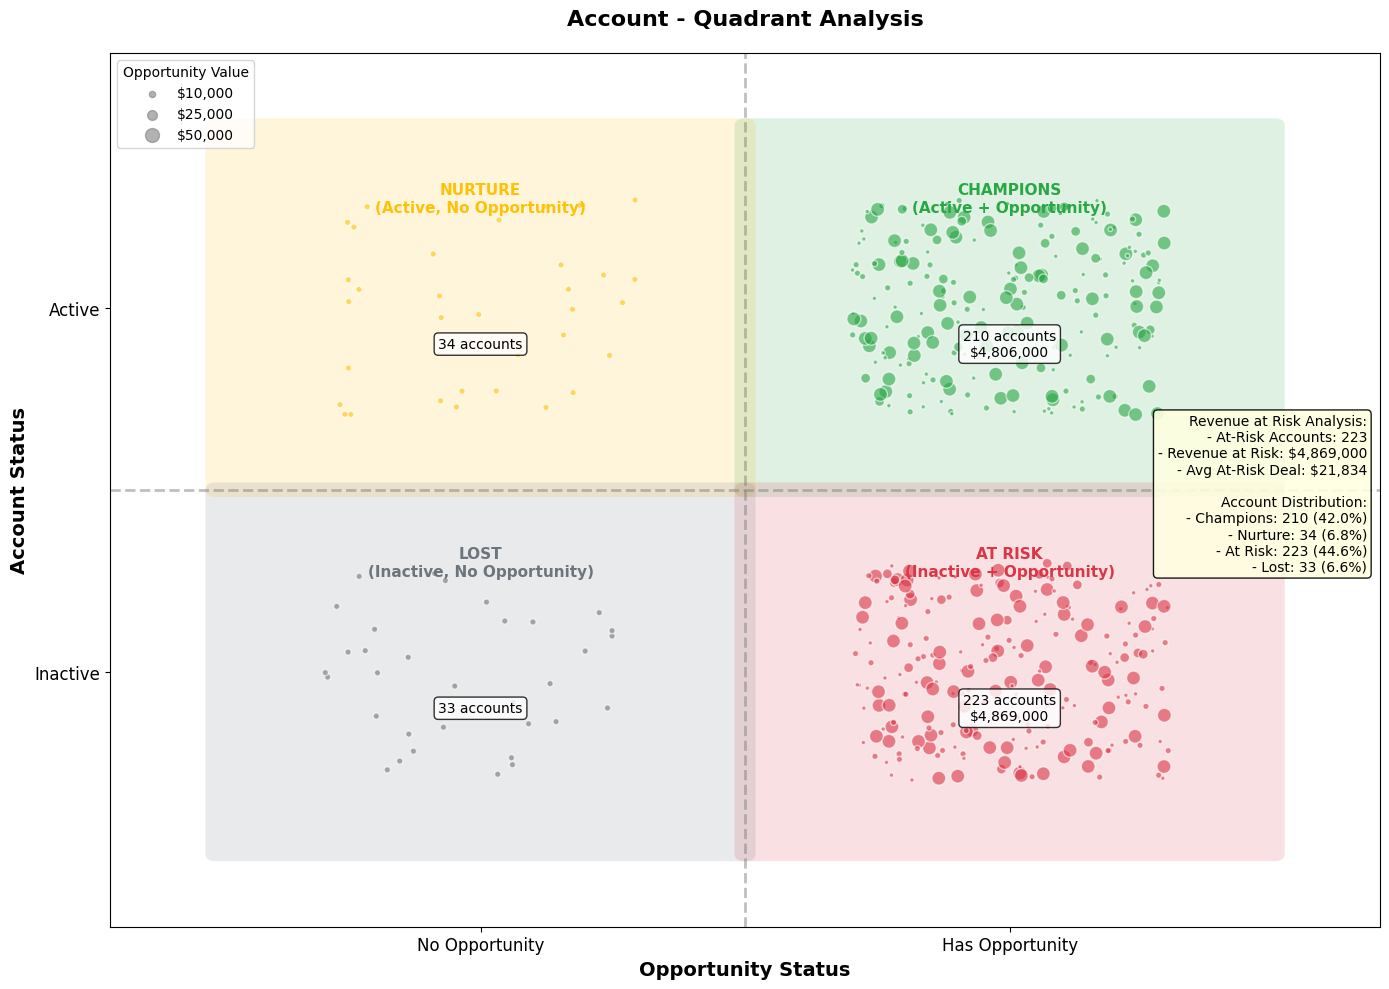

In [3]:
# Read the dataset
df = pd.read_csv('../data/CleanSalesforceData.csv')

# Indicators
df['has_opportunity'] = df['opportunity_amount'].notna()
df['is_active_bool'] = df['is_active'] == True

# Quadrants
quadrants = {
    'Champions': df[(df['is_active_bool'] == True) & (df['has_opportunity'] == True)],
    'Nurture': df[(df['is_active_bool'] == True) & (df['has_opportunity'] == False)],
    'At Risk': df[(df['is_active_bool'] == False) & (df['has_opportunity'] == True)],
    'Lost': df[(df['is_active_bool'] == False) & (df['has_opportunity'] == False)]
}

quadrant_metrics = {}
for name, data in quadrants.items():
    quadrant_metrics[name] = {
        'count': len(data),
        'total_value': data['opportunity_amount'].sum() if 'opportunity_amount' in data.columns else 0,
        'avg_value': data['opportunity_amount'].mean() if len(data) > 0 and 'opportunity_amount' in data.columns else 0,
        'avg_deal_score': data['deal_score'].mean() if len(data) > 0 else 0,
        'avg_engagement': data['engagement_level'].mean() if len(data) > 0 else 0
    }

# Create the quadrant visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Plot
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('Opportunity Status', fontsize=14, fontweight='bold')
ax.set_ylabel('Account Status', fontsize=14, fontweight='bold')
ax.set_title('Account - Quadrant Analysis', fontsize=16, fontweight='bold', pad=20)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=2, alpha=0.5)
ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=2, alpha=0.5)
ax.set_xticks([0.25, 0.75])
ax.set_xticklabels(['No Opportunity', 'Has Opportunity'], fontsize=12)
ax.set_yticks([0.25, 0.75])
ax.set_yticklabels(['Inactive', 'Active'], fontsize=12)

# Define quadrant properties
quadrant_props = {
    'Champions': {'pos': (0.75, 0.75), 'color': '#28a745', 'label': 'CHAMPIONS\n(Active + Opportunity)'},
    'Nurture': {'pos': (0.25, 0.75), 'color': '#ffc107', 'label': 'NURTURE\n(Active, No Opportunity)'},
    'At Risk': {'pos': (0.75, 0.25), 'color': '#dc3545', 'label': 'AT RISK\n(Inactive + Opportunity)'},
    'Lost': {'pos': (0.25, 0.25), 'color': '#6c757d', 'label': 'LOST\n(Inactive, No Opportunity)'}
}

# Add colored backgrounds for each quadrant
for name, props in quadrant_props.items():
    x = 0.5 if props['pos'][0] > 0.5 else 0
    y = 0.5 if props['pos'][1] > 0.5 else 0
    
    rect = FancyBboxPatch((x, y), 0.5, 0.5,
                          boxstyle="round,pad=0.01",
                          facecolor=props['color'],
                          alpha=0.15,
                          edgecolor='none')
    ax.add_patch(rect)
    
    # Quadrant labels
    ax.text(props['pos'][0], props['pos'][1] + 0.15, props['label'],
            ha='center', va='center', fontsize=11, fontweight='bold',
            color=props['color'])

# Jitter prevent spoints from overlapping
np.random.seed(42)
jitter_strength = 0.15

# Plot accounts
for name, data in quadrants.items():
    if len(data) > 0:

        if name == 'Champions':
            x_base, y_base = 0.75, 0.75
        elif name == 'Nurture':
            x_base, y_base = 0.25, 0.75
        elif name == 'At Risk':
            x_base, y_base = 0.75, 0.25
        else:  # Lost
            x_base, y_base = 0.25, 0.25
        
        x_jitter = np.random.uniform(-jitter_strength, jitter_strength, len(data))
        y_jitter = np.random.uniform(-jitter_strength, jitter_strength, len(data))
        
        x_positions = x_base + x_jitter
        y_positions = y_base + y_jitter
        
        # Size of points
        sizes = data['opportunity_amount'].fillna(10000) / 500 if 'opportunity_amount' in data.columns else [20] * len(data)
        sizes = np.clip(sizes, 10, 200) 
        
        # Plot points
        scatter = ax.scatter(x_positions, y_positions,
                           s=sizes,
                           c=quadrant_props[name]['color'],
                           alpha=0.6,
                           edgecolors='white',
                           linewidths=1)

# Metric boxes for each quadrant
for name, props in quadrant_props.items():
    metrics = quadrant_metrics[name]
    
    # Metrics text
    if name in ['Champions', 'At Risk']:
        metrics_text = f"{metrics['count']} accounts\n${metrics['total_value']:,.0f}"
    else:
        metrics_text = f"{metrics['count']} accounts"
    
    ax.text(props['pos'][0], props['pos'][1] - 0.05, metrics_text,
            ha='center', va='center', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Add legend for point sizes
legend_sizes = [10000, 25000, 50000]
legend_points = []
for size in legend_sizes:
    legend_points.append(ax.scatter([], [], s=size/500, c='gray', alpha=0.6))
ax.legend(legend_points, [f'${s:,.0f}' for s in legend_sizes],
         title='Opportunity Value', loc='upper left', frameon=True, fancybox=True)

# Calculate risk metrics
at_risk_revenue = quadrants['At Risk']['opportunity_amount'].sum()

# Summary box
summary_text = f"""Revenue at Risk Analysis:
- At-Risk Accounts: {quadrant_metrics['At Risk']['count']}
- Revenue at Risk: ${at_risk_revenue:,.0f}
- Avg At-Risk Deal: ${quadrant_metrics['At Risk']['avg_value']:,.0f}

Account Distribution:
- Champions: {quadrant_metrics['Champions']['count']} ({quadrant_metrics['Champions']['count']/len(df)*100:.1f}%)
- Nurture: {quadrant_metrics['Nurture']['count']} ({quadrant_metrics['Nurture']['count']/len(df)*100:.1f}%)
- At Risk: {quadrant_metrics['At Risk']['count']} ({quadrant_metrics['At Risk']['count']/len(df)*100:.1f}%)
- Lost: {quadrant_metrics['Lost']['count']} ({quadrant_metrics['Lost']['count']/len(df)*100:.1f}%)"""

fig.text(0.98, 0.5, summary_text, transform=fig.transFigure,
         fontsize=10, verticalalignment='center', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()



### Analysis

This visualizstion puts accounts into four quadrants based on two things. These are whether the account is active and the account has an opportunity. The four quadrants are:

- Champions: Active Accounts with Opportunities
- Nurture: Active Accounts without Opportunities
- At Risk: Inactive Accounts with Opportunities
- Lost: Inactive Accounts without Opportunities

A large amount of accounts are in the Lost or At Risk quadrant. This reflects poorly maintianed data within the system, and a poor re-engagement strategy. The At Risk quadrant is especilly concerning since this highlights how much money could potentially be lost if the opportunities are not being followed up on. We also can see just how much each deal on average is worth in this quadrant and how these deals make up the majority of all deals. 

As far as recommendations, I would start with increasing the activity with accounts in the At Risk and Nurtured quadrants. For accounts in the Nurtured quadrant we could target them with personalized campaigns or other strategies that could lead to offers down the line. For the At Risk quadrant we could investigate why they went cold, and assign senior employees to rekindle contact and maybe even provide specialized incentives. For the Champions quadrant its all about maintaining and deepening relationships. Laslty, for the lost quadrant we could archive this data if we really need it or put some limited resources into it to see if we can bring some back. 


## Deals Score and Opportunity Correlation

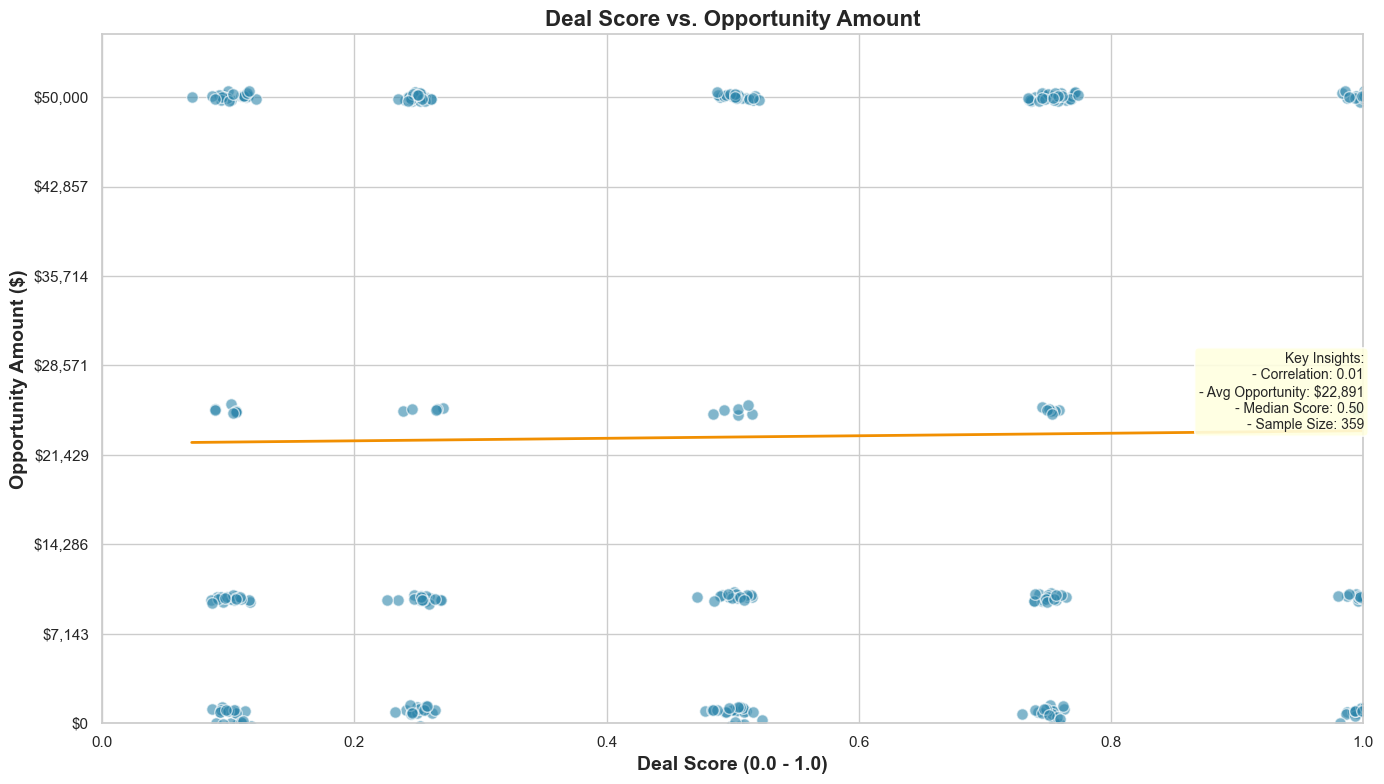

In [4]:
# Read dataset
df = pd.read_csv('../data/CleanSalesforceData.csv')

# Filter rows where both deal_score and opportunity_amount are not null
score_df = df[df['deal_score'].notna() & df['opportunity_amount'].notna()]

# Create the visualization
plt.figure(figsize=(14, 8))
sns.set(style='whitegrid')

jittered_df = score_df.copy()
jittered_df['deal_score'] += np.random.normal(0, 0.01, size=len(jittered_df))
jittered_df['opportunity_amount'] += np.random.normal(0, 200, size=len(jittered_df))

# Scatter plot with regression line
scatter = sns.regplot(
    x='deal_score',
    y='opportunity_amount',
    data=jittered_df,
    scatter_kws={'alpha': 0.6, 'color': '#2E86AB', 'edgecolor': 'white', 's': 70},
    line_kws={'color': '#F18F01', 'lw': 2},
    ci=None
)

# Titles and labels
plt.title('Deal Score vs. Opportunity Amount', fontsize=16, fontweight='bold')
plt.xlabel('Deal Score (0.0 - 1.0)', fontsize=14, fontweight='bold')
plt.ylabel('Opportunity Amount ($)', fontsize=14, fontweight='bold')

# Axes customization
plt.xlim(0, 1)
plt.ylim(0, score_df['opportunity_amount'].max() * 1.1)
plt.yticks(np.linspace(0, score_df['opportunity_amount'].max(), 8))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Summary metrics
correlation = score_df['deal_score'].corr(score_df['opportunity_amount'])
summary_text = f"""Key Insights:
- Correlation: {correlation:.2f}
- Avg Opportunity: ${score_df['opportunity_amount'].mean():,.0f}
- Median Score: {score_df['deal_score'].median():.2f}
- Sample Size: {len(score_df)}"""

# Summary box on the right
plt.gcf().text(0.98, 0.5, summary_text,
               transform=plt.gcf().transFigure,
               fontsize=10, verticalalignment='center', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9))

plt.tight_layout()
plt.show()


### Analysis

This visualization shows the correlation between the deal score and the opportunity amount. I wanted to validate whether a higher deal score correlated with a higher opportunity amount. This chart also provided the average and median correlations across the dataset. Conceringly we see that there is no correlation which suggests that the deal score is not very effective at predicting the opportunity amount. You can see the trend line is flat, reiforcing this. 

Since there is no correlation, I would recommend not using the deal score at its current state as a metric to predict the opportunity amount. Relying on this could cause the sales team to focus on the wrong deals the do not have high returns. I would reccomend examining the model used to produce this score and considering feeding it more features to produce a more accurate score. 